<a href="https://colab.research.google.com/github/rakeshvitta/rakeshvitta/blob/main/Group250_Anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
**Team:**

NAVIN APPUKUTTAN NAIR - 2021fc04720

N VISWANATHAN - 2021fc04318

RAKESH VITTA - 2021fc04673

**Dataset:** Anamoly Detection

Location of the Dataset: https://drive.google.com/file/d/1n3hnxH9FPlGJVrbJgXr0fcLpNOvVDJQ-/view?usp=sharing 
</h1>

<h2>Importing Libraries</h2>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

<h2>Import Dataset into the Notebook</h2>

In [47]:
url = 'https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/Anamoly.csv'
df = pd.read_csv(url)

<h1>Data Visualization and Exploration</h1>



1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them. ✅
2. Comment on class imbalance with appropriate visualization method. ✅
3. Provide appropriate visualizations to get an insight about the dataset. ❌
4. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer. Answers without 
justification will not be awarded marks. ❌
5. Any other visualization specific to the problem statement. ❌




<h2>1. Print 2 rows for sanity check</h2>

In [48]:
df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [49]:
df.iloc[:2,:20]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df.iloc[:2,21:]

,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255.0,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255.0,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [51]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<h2>2. Comment on class imbalance with appropriate visualization method.</h2>

In [52]:
#Check the data type of the class and printing the values it takes and counts for each value
df['class'].dtypes
df['class'].value_counts()

anomaly    12833
normal      9711
Name: class, dtype: int64

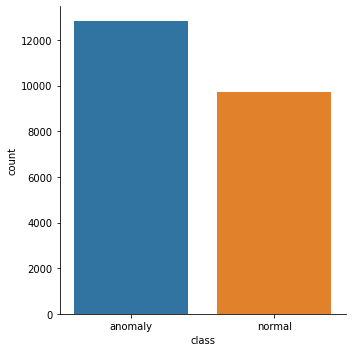

In [53]:
#Looking at the values the dataset is not imbalanced. Visualize the balance:
plot = sns.catplot(x="class", kind="count",  data=df)

*From the plot we can see there is no clear imbalance between the classes in the given data set.*





<h2>3. Provide appropriate visualizations to get an insight about the dataset.</h2>




> Visualizing different features/columns to see the values and distribution



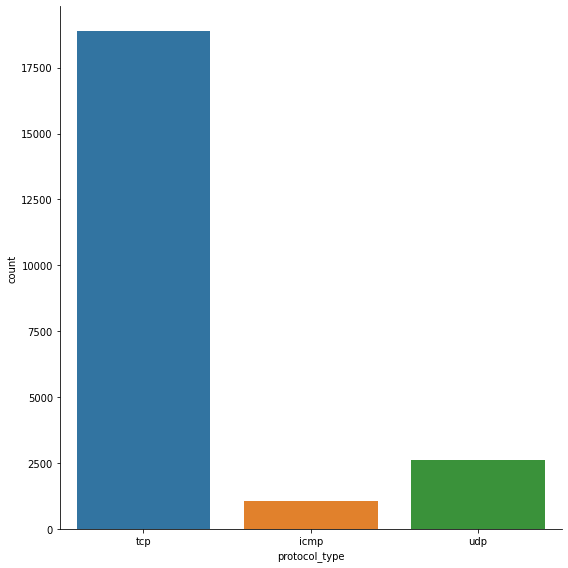

In [54]:
#Checking value counts of feature protocol_type
sns.catplot(x="protocol_type", kind="count",height=8, aspect=1,  data=df);

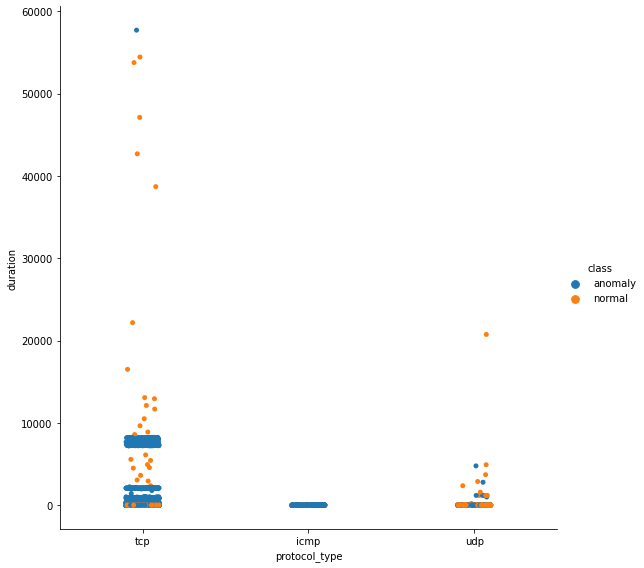

In [55]:
#
sns.catplot(x="protocol_type", y = "duration" ,hue="class",height=8, aspect=1,  data=df);


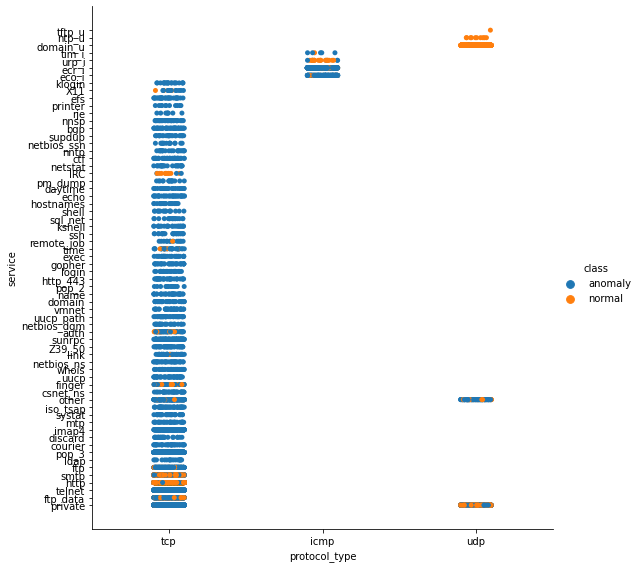

In [56]:
sns.catplot(x="protocol_type", y = "service" ,hue="class",height=8, aspect=1,  data=df);


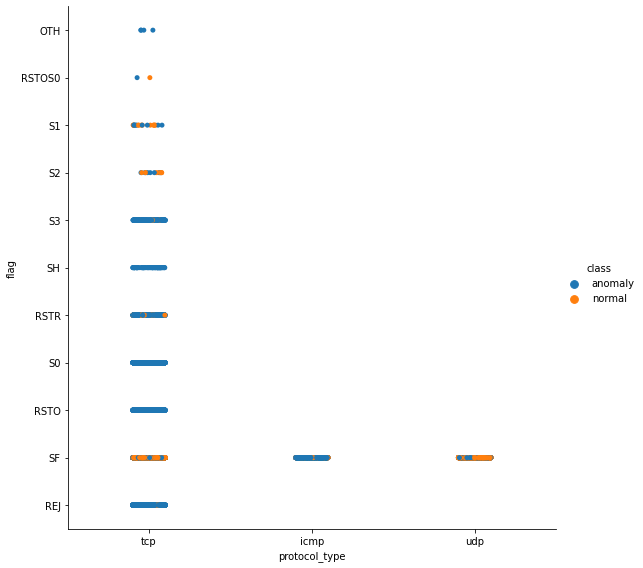

In [57]:
sns.catplot(x="protocol_type", y = "flag" , hue="class",height=8, aspect=1,  data=df);


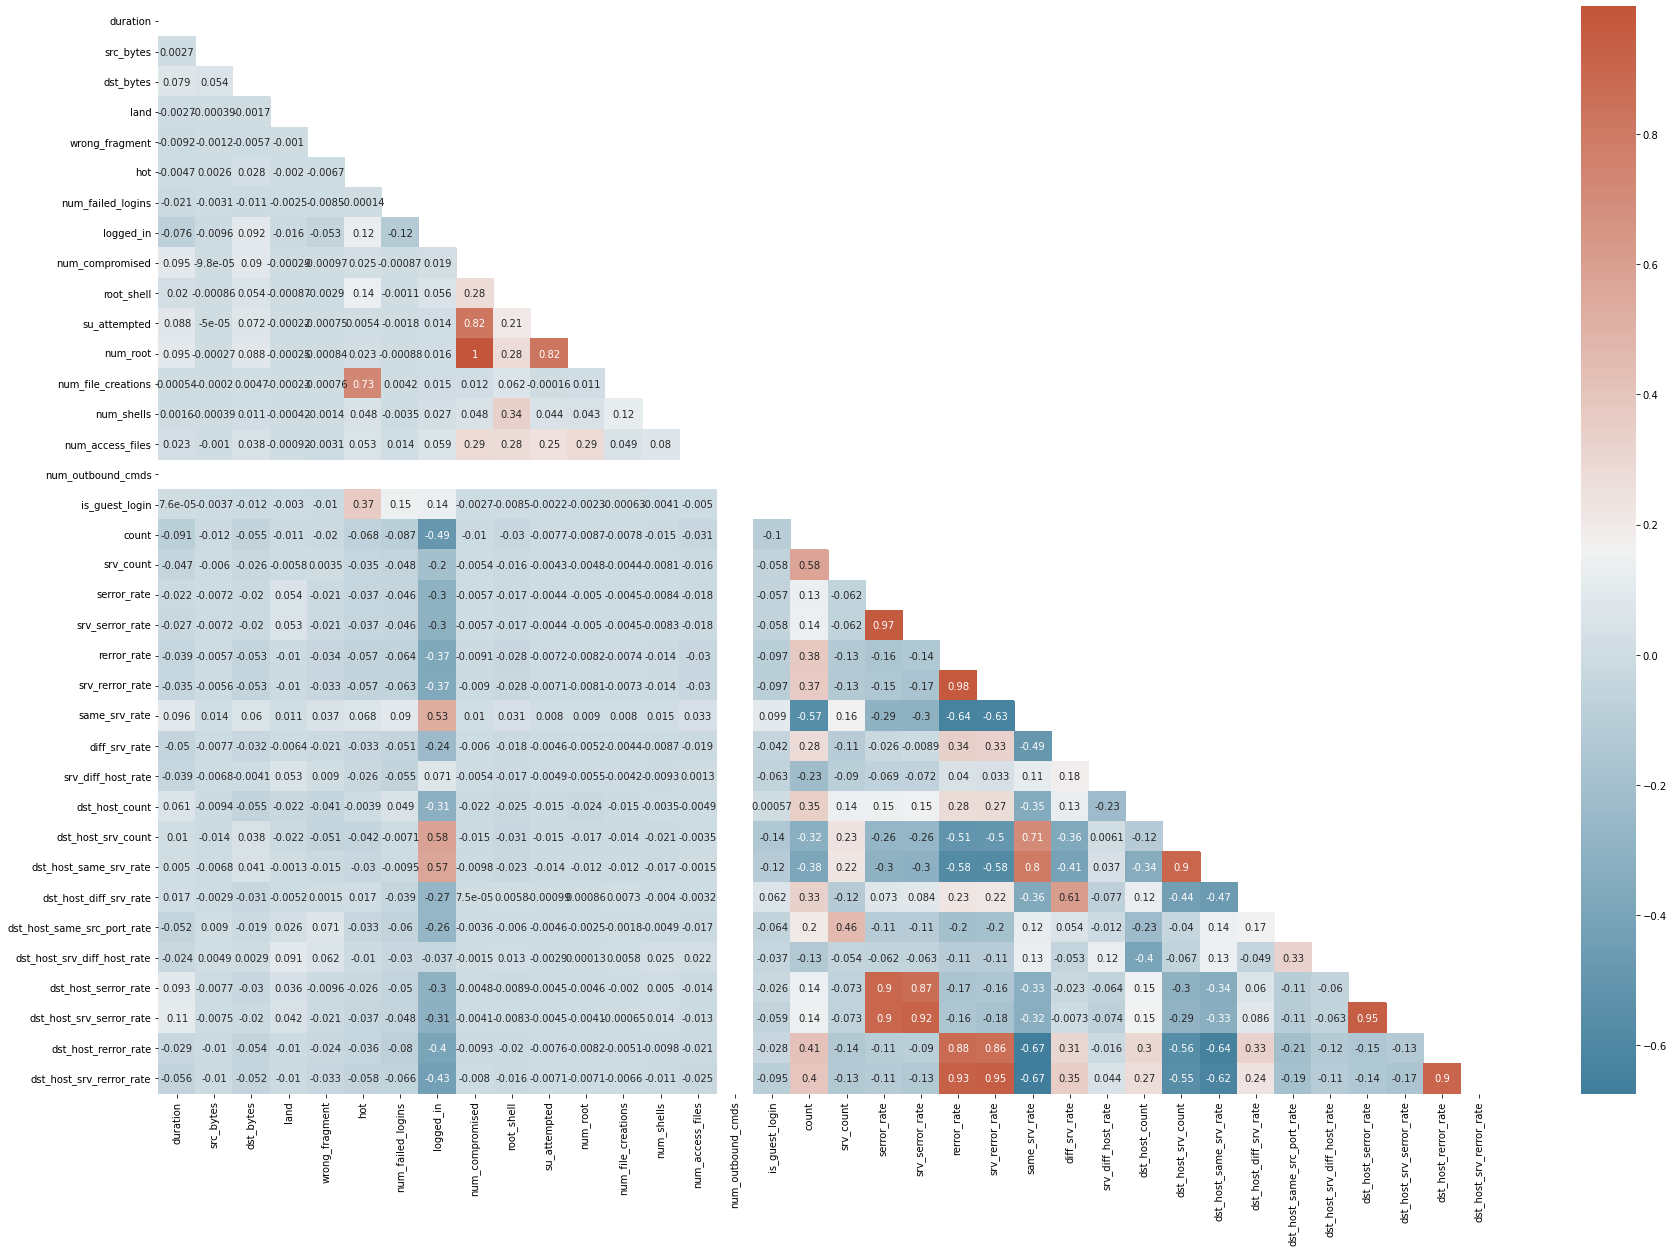

In [69]:
#Correlation Analysis
cor = df.corr()
f, ax = plt.subplots(figsize=(30, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)

<h1> Data Preprocessing and Cleaning </h1>


1.  Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters.  ❌
2.   Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks.  Explore a few techniques for identifying feature importance for your feature engineering task. ❌






Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters. 

In [58]:
#Identifying and replacing/dropping null or missing values in the data set
e_df=pd.DataFrame().from_records([{"empty_prec":np.round(len(df[df[col].isna()])/len(df), 4)*100, "col":col} for col in df.columns])
print(e_df)

    empty_prec                          col
0         0.00                     duration
1         0.00                protocol_type
2         0.00                      service
3         0.00                         flag
4         0.00                    src_bytes
5         0.00                    dst_bytes
6         0.00                         land
7         0.00               wrong_fragment
8         0.00                          hot
9         0.00            num_failed_logins
10        0.00                    logged_in
11        0.00              num_compromised
12        0.00                   root_shell
13        0.00                 su_attempted
14        0.00                     num_root
15        0.00           num_file_creations
16        0.00                   num_shells
17        0.00             num_access_files
18        0.00            num_outbound_cmds
19        0.00               is_guest_login
20        0.00                        count
21        0.00                  

In [59]:
#Only the features dst_host_count and dst_host_srv_count have empty cells
df['dst_host_count'].describe()

count    22531.000000
mean       193.863965
std         94.042593
min          0.000000
25%        121.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64

In [60]:
df['dst_host_srv_count'].describe()

count    22532.000000
mean       140.752663
std        111.786948
min          0.000000
25%         15.000000
50%        168.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64

In [61]:
print(df['dst_host_srv_count'].value_counts())
print(df['dst_host_count'].value_counts())

255.0    7525
1.0      1594
254.0     607
253.0     397
2.0       395
         ... 
202.0      10
112.0      10
207.0      10
205.0       7
0.0         1
Name: dst_host_srv_count, Length: 256, dtype: int64
255.0    14629
1.0        365
2.0        236
3.0        200
4.0        182
         ...  
203.0       10
195.0        7
227.0        7
246.0        7
0.0          1
Name: dst_host_count, Length: 256, dtype: int64


In [62]:
mode_dst = df['dst_host_count'].mode()[0]
mode_dst_host = df['dst_host_srv_count'].mode()[0]
n_df = df.copy(deep=True)
n_df['dst_host_count'].fillna(mode_dst, inplace = True)
n_df['dst_host_srv_count'].fillna(mode_dst_host, inplace = True)

In [63]:
n_df['dst_host_count'].describe()

count    22544.000000
mean       193.899219
std         94.026928
min          0.000000
25%        121.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64

In [64]:
n_df['dst_host_srv_count'].describe()

count    22544.000000
mean       140.813476
std        111.788256
min          0.000000
25%         15.000000
50%        168.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64

<i>Observe that the mean and std didnt change by much after replacing the missing values by the mode.</i>

In [65]:
#Removing rows with outlier data using the zscore mechanism 

n_df['zscore'] = ( n_df.duration - n_df.duration.mean() ) / n_df.duration.std()
print(n_df[n_df['zscore']>3])
df_n1 = n_df[(n_df.zscore>-3) & (n_df.zscore<3)]
print("Shape of the dataset after removing the outlier rows",df_new.shape)

       duration protocol_type service flag  src_bytes  dst_bytes  land  \
58         7428           tcp  telnet   SF          0         44     0   
77         8092           tcp  telnet   SF          0         15     0   
112        8080           tcp  telnet   SF          0         15     0   
113        8124           tcp  telnet   SF          0         15     0   
134        7554           tcp  telnet   SF          0         44     0   
...         ...           ...     ...  ...        ...        ...   ...   
22299      8216           tcp  telnet   SF          0         15     0   
22353      7477           tcp  telnet   SF          0         44     0   
22432      7264           tcp  telnet   SF          0         44     0   
22517      7498           tcp  telnet   SF          0         44     0   
22519      8209           tcp  telnet   SF          0         15     0   

       wrong_fragment  hot  num_failed_logins  ...  dst_host_same_srv_rate  \
58                  0    0       

In [66]:
#Feature - src_bytes
df_n1['zscore'] = ( df_n1.src_bytes - df_n1.src_bytes.mean() ) / df_n1.src_bytes.std()
df_n2 = df_n1[(df_n1.zscore>-3) & (df_n1.zscore<3)]
#Feature - dst_bytes
df_n2['zscore'] = ( df_n2.dst_bytes - df_n2.dst_bytes.mean() ) / df_n2.dst_bytes.std()
df_new = n_df[(n_df.zscore>-3) & (n_df.zscore<3)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [67]:
#Removing the zscore column before we run the model on the dataset
new_df = df_new.loc[:, df_new.columns != "zscore"]
print(new_df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [70]:
#Removing columns that have high correlation from the dataset.
upper = cor.where(np.triu(np.ones(cor.shape),k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df2 = new_df.drop(columns= to_drop, axis=1)
df2.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [71]:
#Normalization of the numerical features
#Columns duration, src_bytes and dst_bytes have very large range. We can normalize them into [0,1] range 
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_dur = scaler.fit_transform(df2[['duration']])
df2['duration']=scaled_dur
scaled_src = scaler.fit_transform(df2[['src_bytes']])
df2['src_bytes']=scaled_src
scaled_dst = scaler.fit_transform(df2[['dst_bytes']])
df2['dst_bytes']=scaled_dst


In [72]:
#Check the normalized data
df2.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,...,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000
mean,0.010508,0.000169,0.001490,0.000317,0.008617,0.107755,0.022132,0.451701,0.058322,0.002404,...,192.729660,140.594512,0.608866,0.089693,0.135095,0.020060,0.092502,0.093091,0.235346,0.230556
std,0.056931,0.007609,0.014557,0.017815,0.144182,0.938635,0.151967,0.497673,2.893541,0.048969,...,94.529327,112.427395,0.438372,0.220680,0.308940,0.086285,0.271973,0.279792,0.390042,0.404125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,116.000000,14.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000002,0.000039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,166.000000,0.950000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000005,0.000472,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.380000,0.220000
max,1.000000,1.000000,1.000000,1.000000,3.000000,101.000000,4.000000,1.000000,381.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#df2 here is the dataset that has the preprocessed and feature engineered data. Use this for the model.

<h1> Model Building </h1>


1.   Split the dataset into training and test sets. Answers without justification will not be awarded marks. ❌

Case 1 :   Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ; 

   [ x_test1,y_test1] = 20% ; 

Case 2 :   Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; 

[ x_test2,y_test2] = 90%  

2.   Explore k-fold cross validation. ❌
3. Model the classifier using GaussianNB, BernoulliNB, and Multinomial NB.  
4. Explore the need of regularization and incorporate few relevant techniques for the problem statement. ❌
5. Compare models with and without regularization in a tabular format and justify the findings. ❌



<h1> Performance Evaluation </h1>


1.   Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your model. Justify your answer. Answers without justification will not be awarded marks. ❌ 
2. Comment on underfitting/overfitting/just right model. Justify your comment. 
Answers without justification will not be awarded marks. ❌


